# Measurement Script

In [16]:
import datetime

In [38]:
input("Press Enter when seconds hand reaches 0")
dt_true = datetime.datetime.now()

minute = int(input("At what minute did you record the time?"))
dt_watch = dt_true.replace(minute=minute, second=0, microsecond=0)

if dt_watch > dt_true:  # watch is running fast, timedelta is positive

    t_delta = dt_watch - dt_true
    delta = t_delta.total_seconds()

elif dt_watch < dt_true:  # watch is running slow, timedelta is negative

    t_delta = dt_true - dt_watch
    delta = -t_delta.total_seconds()

else:
    delta = 0

print(f"Your watch differs by {delta:.1f} seconds.")

save = input("Type 'y' to save this timestamp: ")

if save == 'y':
    f = open("debug_data.csv", "a")
    f.write(f"{dt_watch},{delta:.1f}\n")
    f.close()

Your watch differs by 15.440426 seconds.


In [23]:
print(dt_watch)
print(dt_true)

2023-12-26 14:03:00


# Analysis

In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
str_dates, deltas = np.loadtxt('debug_data.csv', dtype=[('date', datetime.datetime), ('delta', float)], delimiter=',', unpack=True)

In [64]:
dates = np.array([datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in str_dates])

In [65]:
avg_daily_dev = (deltas[-1] - deltas[0])/((dates[-1] - dates[0]).total_seconds() / 86400)

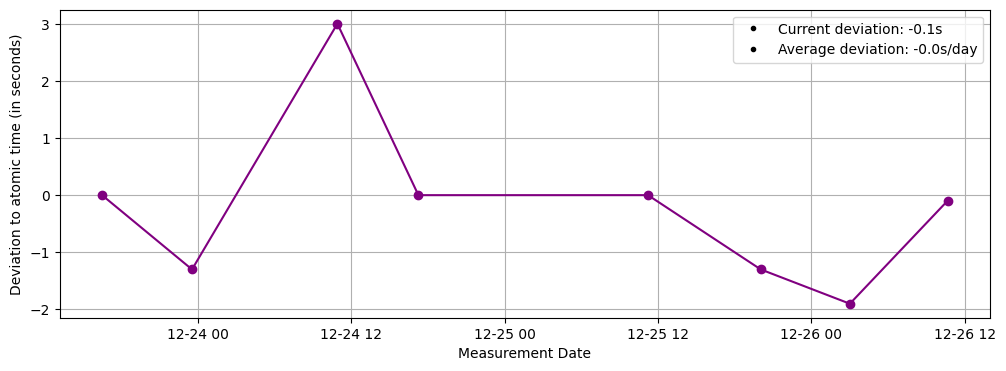

In [66]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot()

ax.plot(dates[-1], deltas[-1], 'k.', label=f"Current deviation: {deltas[-1]}s")
ax.plot(dates[-1], deltas[-1], 'k.', label=f"Average deviation: {avg_daily_dev:.1f}s/day")

ax.plot(dates, deltas, c='purple', marker='o', ls='-')
ax.set_xlabel("Measurement Date")
ax.set_ylabel("Deviation to atomic time (in seconds)")
ax.grid()
ax.legend();